# EDA: Los Angeles County Crime & Arrest Data

## COM SCI X 450.1: Intro to Data Science


### Jordan Campbell

## Overview of the Data

The two datasets used in this project from Kaggle (url: https://www.kaggle.com/cityofLA/los-angeles-crime-arrest-data) (1) arrest data and (2) reported crime data in Los Angeles County, CA. The data is provided by the city of Los Angeles which is also available on the city's webpage (url: https://data.lacity.org/).

Both datasets range from January 2010 to June 2010.

Arrest data contains 23 columns: (1) Report ID, (2) Arrest Date, (3) Time, (4) Area ID, (5) Area Name, (6) Reporting District, (7) Age, (8) Sex Code, (9) Descent Code, (10) Charge Group Code, (11) Charge Group Description, (12) Arrest Type Code, (13) Charge, (14) Charge Description, (15) Address, (16) Cross Street, (17) Location, (18) Zip Codes, (19) Census Tracts, (20) Precint Boundaries, (21) LA Specific Plans, (22) Council Districts, (23) Neighborhood Councils (Certified).

Crime data contains 26 columns: (1) DR Number, (2) Date Reported, (3) Date Occurred, (4) Time Occurred, (5) Area ID, (6) Area Name, (7) Reporting District, (8) Crime Code, (9) Crime Code Description, (10) MO Codes, (11) Victim Age, (12) Victim Sex, (13) Victim Descent, (14) Premise Code, (15) Premise Description, (16) Weapon Used Code, (17) Weapon Description, (18) Status Code, (19) Status Description, (20) Crime Code 1, (21) Crime Code 2, (22) Crime Code 3, (23) Crime Code 4, (24) Address, (25) Cross Street, and (26) Location.

Additional columns are added to both datasets to indicate arrests ("Arrests"), reported crimes ("Crimes"), latitude, and longitude. 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import datetime as datetime

In [4]:
%pwd

'C:\\Users\\Jordan\\Documents\\Bayesian'

In [18]:
arrest_df = pd.read_csv('arrest-data-from-2010-to-present.csv')

arrest_df.tail()

,Report ID,Arrest Date,Time,Area ID,Area Name,Reporting District,Age,Sex Code,Descent Code,Charge Group Code,...,Charge Description,Address,Cross Street,Location,Zip Codes,Census Tracts,Precinct Boundaries,LA Specific Plans,Council Districts,Neighborhood Councils (Certified)
1276155,100504416,2010-01-01T00:00:00.000,1430.0,5,Harbor,521,17,M,H,24.0,...,MINOR BUY/ETC TOBACCO/ETC,4TH,GAFFEY,"{'latitude': '33.7406', 'human_address': '{""ad...",3342.0,975.0,1205.0,NaN,15.0,36.0
1276156,101104731,2010-01-01T00:00:00.000,2215.0,11,Northeast,1118,12,M,H,24.0,...,CURFEW - JUV ONLY,AVENUE 58,FIGUEROA ST,"{'latitude': '34.1101', 'human_address': '{""ad...",23673.0,370.0,477.0,28.0,11.0,93.0
1276157,101104211,2010-01-01T00:00:00.000,1310.0,11,Northeast,1128,52,M,H,18.0,...,DRINKING IN PUBLIC,YORK BL,AVENUE 63,"{'latitude': '34.1148', 'human_address': '{""ad...",23673.0,359.0,575.0,NaN,9.0,93.0
1276158,2179817,2010-01-01T00:00:00.000,319.0,14,Pacific,1408,24,M,H,22.0,...,DRUNK DRIVING ALCOHOL/DRUGS,NATIONAL BL,MANNING AV,"{'latitude': '34.0301', 'human_address': '{""ad...",23451.0,872.0,1124.0,9.0,6.0,75.0
1276159,2180332,2010-01-01T00:00:00.000,1815.0,19,Mission,1994,25,M,W,16.0,...,POSSESSION CONTROLLED SUBSTANCE,ROSCOE,WILLIS,"{'latitude': '34.2215', 'human_address': '{""ad...",19730.0,147.0,418.0,NaN,3.0,59.0


## Focus on Felony Arrests

In [19]:
for var in arrest_df['Arrest Type Code'].unique(): 
    print(var) 

M
O
F
D
I


 M - Misdemeanor, O - Other, F - Felony, D - Dependent, I - Infraction

In [20]:
arrest_df = arrest_df[arrest_df['Arrest Type Code'] == 'F']

# Can be turned off to look at all arrest types or other arrest types, see above.

In [21]:
crime_df = pd.read_csv('crime-data-from-2010-to-present.csv')

crime_df.head()

,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,MO Codes,...,Weapon Description,Status Code,Status Description,Crime Code 1,Crime Code 2,Crime Code 3,Crime Code 4,Address,Cross Street,Location
0,102005556,2010-01-25T00:00:00,2010-01-22T00:00:00,2300,20,Olympic,2071,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,VAN NESS,15TH,"{'latitude': '34.0454', 'needs_recoding': Fals..."
1,101822289,2010-11-11T00:00:00,2010-11-10T00:00:00,1800,18,Southeast,1803,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,88TH,WALL,"{'latitude': '33.9572', 'needs_recoding': Fals..."
2,101105609,2010-01-28T00:00:00,2010-01-27T00:00:00,2230,11,Northeast,1125,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,YORK,AVENUE 51,"{'latitude': '34.1211', 'needs_recoding': Fals..."
3,101620051,2010-11-11T00:00:00,2010-11-07T00:00:00,1600,16,Foothill,1641,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,EL DORADO,TRUESDALE,"{'latitude': '34.241', 'needs_recoding': False..."
4,101910498,2010-04-07T00:00:00,2010-04-07T00:00:00,1600,19,Mission,1902,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,GLENOAKS,DRELL,"{'latitude': '34.3147', 'needs_recoding': Fals..."


### Data Frame General Information & Summary Statistics

In [22]:
arrest_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 405386 entries, 4 to 1276159
Data columns (total 23 columns):
Report ID                            405386 non-null int64
Arrest Date                          405386 non-null object
Time                                 405384 non-null float64
Area ID                              405386 non-null int64
Area Name                            405386 non-null object
Reporting District                   405386 non-null int64
Age                                  405386 non-null int64
Sex Code                             405386 non-null object
Descent Code                         405386 non-null object
Charge Group Code                    403981 non-null float64
Charge Group Description             403974 non-null object
Arrest Type Code                     405386 non-null object
Charge                               405386 non-null object
Charge Description                   403981 non-null object
Address                              405386 non-nu

In [23]:
crime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1993259 entries, 0 to 1993258
Data columns (total 26 columns):
DR Number                 int64
Date Reported             object
Date Occurred             object
Time Occurred             int64
Area ID                   int64
Area Name                 object
Reporting District        int64
Crime Code                int64
Crime Code Description    object
MO Codes                  object
Victim Age                int64
Victim Sex                object
Victim Descent            object
Premise Code              float64
Premise Description       object
Weapon Used Code          float64
Weapon Description        object
Status Code               object
Status Description        object
Crime Code 1              float64
Crime Code 2              float64
Crime Code 3              float64
Crime Code 4              float64
Address                   object
Cross Street              object
Location                  object
dtypes: float64(6), int64(6),

### Creating a count row for arrests & crime

In [24]:
arrest_df.loc[:, 'Arrests'] = 1

arrest_df.head()

,Report ID,Arrest Date,Time,Area ID,Area Name,Reporting District,Age,Sex Code,Descent Code,Charge Group Code,...,Address,Cross Street,Location,Zip Codes,Census Tracts,Precinct Boundaries,LA Specific Plans,Council Districts,Neighborhood Councils (Certified),Arrests
4,5666742,2019-06-22T00:00:00.000,1240.0,14,Pacific,1472,28,M,W,8.0,...,6600 ESPLANADE ST,NaN,"{'latitude': '33.9609', 'human_address': '{""ad...",25075.0,937.0,241.0,10.0,10.0,16.0,1
6,5666496,2019-06-22T00:00:00.000,40.0,1,Central,128,31,M,B,16.0,...,2ND ST,CENTRAL,"{'latitude': '34.0472', 'human_address': '{""ad...",22728.0,536.0,1502.0,NaN,9.0,28.0,1
9,5666871,2019-06-22T00:00:00.000,1615.0,12,77th Street,1293,14,M,B,12.0,...,W 104TH ST,S WESTERN AV,"{'latitude': '33.9419', 'human_address': '{""ad...",23678.0,779.0,1170.0,7.0,14.0,20.0,1
11,5666635,2019-06-22T00:00:00.000,130.0,19,Mission,1984,36,M,H,1.0,...,14800 ROSCOE BL,NaN,"{'latitude': '34.2265', 'human_address': '{""ad...",19730.0,148.0,419.0,NaN,3.0,59.0,1
16,5666772,2019-06-22T00:00:00.000,850.0,6,Hollywood,645,35,M,W,4.0,...,6800 HOLLYWOOD BL,NaN,"{'latitude': '34.1016', 'human_address': '{""ad...",23446.0,414.0,1303.0,NaN,8.0,82.0,1


In [25]:
crime_df.loc[:, 'Crimes'] = 1

crime_df.head()

,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,MO Codes,...,Status Code,Status Description,Crime Code 1,Crime Code 2,Crime Code 3,Crime Code 4,Address,Cross Street,Location,Crimes
0,102005556,2010-01-25T00:00:00,2010-01-22T00:00:00,2300,20,Olympic,2071,510,VEHICLE - STOLEN,NaN,...,IC,Invest Cont,510.0,NaN,NaN,NaN,VAN NESS,15TH,"{'latitude': '34.0454', 'needs_recoding': Fals...",1
1,101822289,2010-11-11T00:00:00,2010-11-10T00:00:00,1800,18,Southeast,1803,510,VEHICLE - STOLEN,NaN,...,IC,Invest Cont,510.0,NaN,NaN,NaN,88TH,WALL,"{'latitude': '33.9572', 'needs_recoding': Fals...",1
2,101105609,2010-01-28T00:00:00,2010-01-27T00:00:00,2230,11,Northeast,1125,510,VEHICLE - STOLEN,NaN,...,IC,Invest Cont,510.0,NaN,NaN,NaN,YORK,AVENUE 51,"{'latitude': '34.1211', 'needs_recoding': Fals...",1
3,101620051,2010-11-11T00:00:00,2010-11-07T00:00:00,1600,16,Foothill,1641,510,VEHICLE - STOLEN,NaN,...,IC,Invest Cont,510.0,NaN,NaN,NaN,EL DORADO,TRUESDALE,"{'latitude': '34.241', 'needs_recoding': False...",1
4,101910498,2010-04-07T00:00:00,2010-04-07T00:00:00,1600,19,Mission,1902,510,VEHICLE - STOLEN,NaN,...,IC,Invest Cont,510.0,NaN,NaN,NaN,GLENOAKS,DRELL,"{'latitude': '34.3147', 'needs_recoding': Fals...",1


# 1. What identifying information can be gathered on individuals who are victims of crime and individuals being arrested?

## Age

In [36]:
arrest_df['Age'].describe()

count    405386.000000
mean         33.044032
std          12.608065
min           0.000000
25%          23.000000
50%          30.000000
75%          42.000000
max          96.000000
Name: Age, dtype: float64

In [37]:
crime_df['Victim Age'].describe()

count    1.993259e+06
mean     3.178082e+01
std      2.060810e+01
min     -9.000000e+00
25%      2.000000e+01
50%      3.200000e+01
75%      4.600000e+01
max      1.180000e+02
Name: Victim Age, dtype: float64

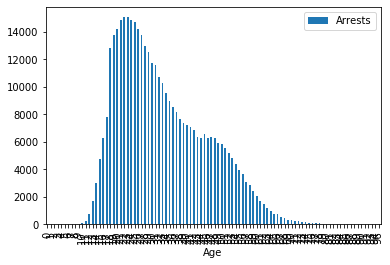

In [38]:
arrest_df[['Age', 'Arrests']].groupby('Age').agg(np.sum).plot(kind = "bar")

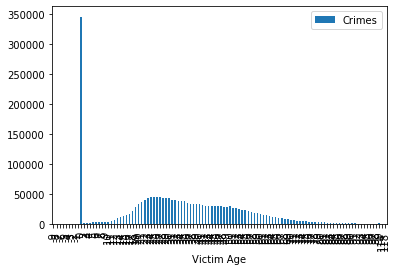

In [43]:
crime_df[['Victim Age', 'Crimes']].groupby('Victim Age').agg(np.sum).plot(kind = "bar")

## Sex

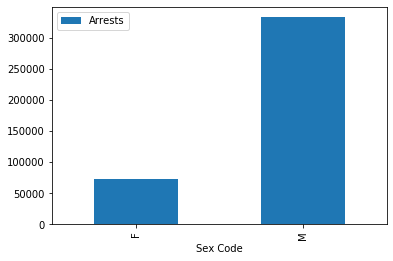

In [40]:
arrest_df[['Sex Code', 'Arrests']].groupby('Sex Code').agg(np.sum).plot(kind = "bar")

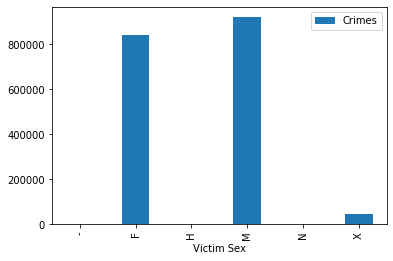

In [42]:
crime_df[['Victim Sex', 'Crimes']].groupby('Victim Sex').agg(np.sum).plot(kind = "bar")

## Race

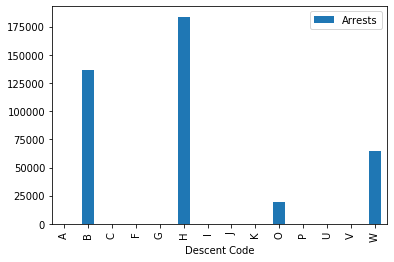

In [46]:
arrest_df[['Descent Code', 'Arrests']].groupby('Descent Code').agg(np.sum).plot(kind = "bar")

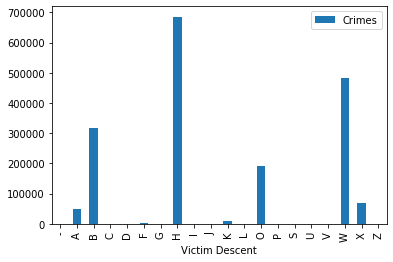

In [47]:
crime_df[['Victim Descent', 'Crimes']].groupby('Victim Descent').agg(np.sum).plot(kind = "bar")

## Location

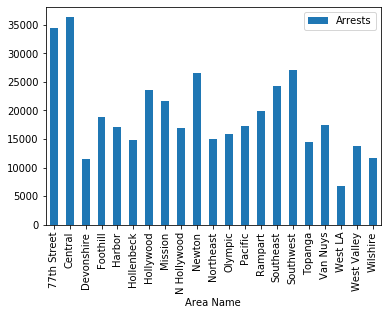

In [26]:
arrest_df[['Area Name', 'Arrests']].groupby('Area Name').agg(np.sum).plot(kind = "bar")

In [31]:
arrest_df[['Area Name', 'Arrests']].groupby('Area Name').agg(np.sum)

,Arrests
Area Name,
77th Street,34430
Central,36306
Devonshire,11503
Foothill,18790
Harbor,17171
Hollenbeck,14797
Hollywood,23635
Mission,21723
N Hollywood,16994


As we can see from above, the areas Central (36306) and 77th Street (34430) have considerably more arrests than other areas. In third place Southwest edges out Newton by ~500.

The descriptive statistics of the areas are available below.

In [33]:
arrest_df[['Area Name', 'Arrests']].groupby('Area Name').agg(np.sum).describe()

,Arrests
count,21.000000
mean,19304.095238
std,7358.452540
min,6731.000000
25%,14797.000000
50%,17332.000000
75%,23635.000000
max,36306.000000


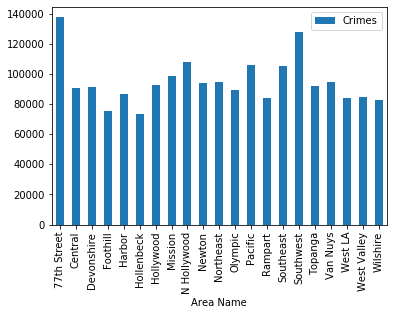

In [27]:
crime_df[['Area Name', 'Crimes']].groupby('Area Name').agg(np.sum).plot(kind = "bar")

In [29]:
crime_df[['Area Name', 'Crimes']].groupby('Area Name').agg(np.sum)

,Crimes
Area Name,
77th Street,137513
Central,90489
Devonshire,91347
Foothill,75348
Harbor,86972
Hollenbeck,73514
Hollywood,92742
Mission,98395
N Hollywood,107707


The top three reported crime areas are: (1) 77th Street (137,513), (2) Southwest (128,111), and (3) N Hollywood (107,707).

Descriptive statistics of the various areas are available below.

In [35]:
crime_df[['Area Name', 'Crimes']].groupby('Area Name').agg(np.sum).describe()

,Crimes
count,21.000000
mean,94917.095238
std,15471.839784
min,73514.000000
25%,84521.000000
50%,92262.000000
75%,98395.000000
max,137513.000000


In [48]:
import folium
import pandas as pd
import json
from folium import plugins

In [49]:
%pwd

'C:\\Users\\Jordan\\Documents\\Bayesian'

In [59]:
new_stack = arrest_df['Location'].str.extract(r'([0-9.-]+).+?([0-9.-]+)')

In [60]:
arrest_df.reset_index(drop=True, inplace=True)

new_stack.reset_index(drop=True, inplace=True)

In [61]:
arrest_stack = pd.concat([arrest_df, new_stack], axis=1)

In [62]:
arrest_stack.rename(columns={0: 'Latitude', 1: 'Longitude'}, inplace=True)

arrest_stack.head()

,Report ID,Arrest Date,Time,Area ID,Area Name,Reporting District,Age,Sex Code,Descent Code,Charge Group Code,...,Location,Zip Codes,Census Tracts,Precinct Boundaries,LA Specific Plans,Council Districts,Neighborhood Councils (Certified),Arrests,Latitude,Longitude
0,5666742,2019-06-22T00:00:00.000,1240.0,14,Pacific,1472,28,M,W,8.0,...,"{'latitude': '33.9609', 'human_address': '{""ad...",25075.0,937.0,241.0,10.0,10.0,16.0,1,33.9609,-118.4504
1,5666496,2019-06-22T00:00:00.000,40.0,1,Central,128,31,M,B,16.0,...,"{'latitude': '34.0472', 'human_address': '{""ad...",22728.0,536.0,1502.0,NaN,9.0,28.0,1,34.0472,-118.2385
2,5666871,2019-06-22T00:00:00.000,1615.0,12,77th Street,1293,14,M,B,12.0,...,"{'latitude': '33.9419', 'human_address': '{""ad...",23678.0,779.0,1170.0,7.0,14.0,20.0,1,33.9419,-118.309
3,5666635,2019-06-22T00:00:00.000,130.0,19,Mission,1984,36,M,H,1.0,...,"{'latitude': '34.2265', 'human_address': '{""ad...",19730.0,148.0,419.0,NaN,3.0,59.0,1,34.2265,-118.4565
4,5666772,2019-06-22T00:00:00.000,850.0,6,Hollywood,645,35,M,W,4.0,...,"{'latitude': '34.1016', 'human_address': '{""ad...",23446.0,414.0,1303.0,NaN,8.0,82.0,1,34.1016,-118.3387


In [63]:
arrest_stack.loc[:, 'Year'] = arrest_stack['Arrest Date'].str[0:4]

arrest_stack.head()

,Report ID,Arrest Date,Time,Area ID,Area Name,Reporting District,Age,Sex Code,Descent Code,Charge Group Code,...,Zip Codes,Census Tracts,Precinct Boundaries,LA Specific Plans,Council Districts,Neighborhood Councils (Certified),Arrests,Latitude,Longitude,Year
0,5666742,2019-06-22T00:00:00.000,1240.0,14,Pacific,1472,28,M,W,8.0,...,25075.0,937.0,241.0,10.0,10.0,16.0,1,33.9609,-118.4504,2019
1,5666496,2019-06-22T00:00:00.000,40.0,1,Central,128,31,M,B,16.0,...,22728.0,536.0,1502.0,NaN,9.0,28.0,1,34.0472,-118.2385,2019
2,5666871,2019-06-22T00:00:00.000,1615.0,12,77th Street,1293,14,M,B,12.0,...,23678.0,779.0,1170.0,7.0,14.0,20.0,1,33.9419,-118.309,2019
3,5666635,2019-06-22T00:00:00.000,130.0,19,Mission,1984,36,M,H,1.0,...,19730.0,148.0,419.0,NaN,3.0,59.0,1,34.2265,-118.4565,2019
4,5666772,2019-06-22T00:00:00.000,850.0,6,Hollywood,645,35,M,W,4.0,...,23446.0,414.0,1303.0,NaN,8.0,82.0,1,34.1016,-118.3387,2019


In [ ]:
# Confine range to ensure that HTML is useable

# For Example

df = stack[stack['Year'] == '2019']

In [64]:
import json
with open('C:\\Users\\Jordan\\Documents\\Bayesian\\laZips.geojson') as f:
    laArea = json.load(f)

In [65]:
#initialize the map around LA County
laMap = folium.Map(location=[34.0522,-118.2437], tiles='Stamen Toner', zoom_start=9)

#add the shape of LA County to the map
folium.GeoJson(laArea).add_to(laMap)

#for each row in the  dataset, plot the corresponding latitude and longitude on the map
for i,row in arrest_stack.iterrows():
    folium.CircleMarker((row.Latitude,row.Longitude), radius=3, weight=2, color='red', fill_color='red', fill_opacity=.5).add_to(laMap)

#save the map as an html    
laMap.save('LA_Arrest_Map.html')

# Analysis of Arrests & Reported Crime

Hourly analysis is too short of a time frame, but interesting to look at.

In [66]:
hourly_df = arrest_df[['Time', 'Arrests']]

hourly_df = hourly_df.set_index('Time')

# hourly_df = hourly_df.resample('d').sum()

hourly_df.reset_index(inplace=True)

hourly_df.head()

,Time,Arrests
0,1240.0,1
1,40.0,1
2,1615.0,1
3,130.0,1
4,850.0,1


In [67]:
hourly_df['Time'] = hourly_df['Time']/100

hourly_df['Time'] = np.floor(hourly_df['Time'])

hourly_df.head(50)

,Time,Arrests
0,12.0,1
1,0.0,1
2,16.0,1
3,1.0,1
4,8.0,1
5,11.0,1
6,23.0,1
7,18.0,1
8,2.0,1
9,1.0,1


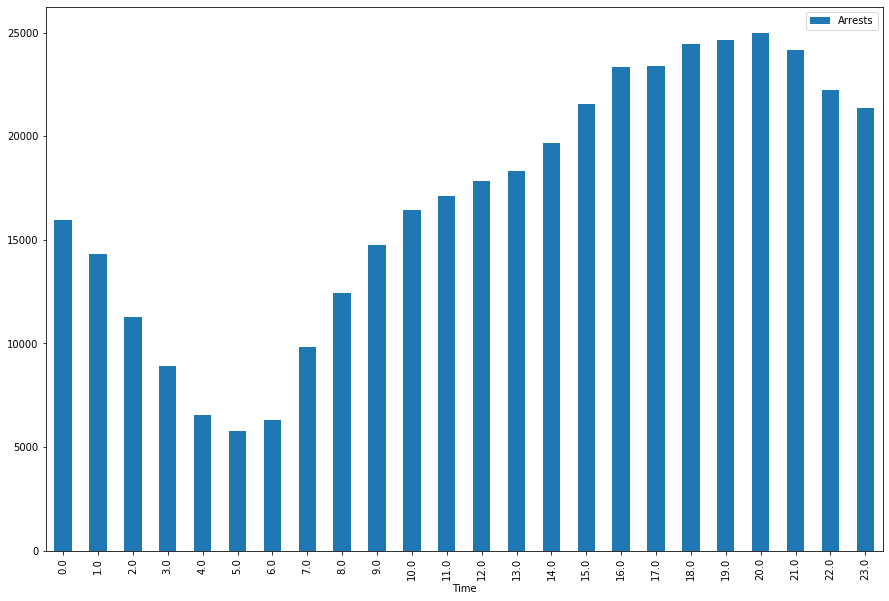

In [68]:
hourly_df = hourly_df.groupby(['Time']).sum()

hourly_df = hourly_df.drop(24, axis=0)

hourly_df.head(30)

hourly_df.plot.bar(figsize = (15, 10))

In [69]:
arrest_df['Arrest Date'] = pd.to_datetime(arrest_df['Arrest Date'])

daily_arrest = arrest_df[['Arrest Date', 'Arrests']]

daily_arrest = daily_arrest.set_index('Arrest Date')

daily_arrest = daily_arrest.resample('d').sum()

daily_arrest.reset_index(inplace=True)

In [70]:
daily_arrest.tail()

,Arrest Date,Arrests
3455,2019-06-18,89
3456,2019-06-19,102
3457,2019-06-20,62
3458,2019-06-21,20
3459,2019-06-22,6


In [71]:
#Quality Control

daily_arrest = daily_arrest.drop([3457, 3458, 3459], axis=0)

daily_arrest.tail(30)

,Arrest Date,Arrests
3427,2019-05-21,107
3428,2019-05-22,100
3429,2019-05-23,122
3430,2019-05-24,81
3431,2019-05-25,92
3432,2019-05-26,98
3433,2019-05-27,101
3434,2019-05-28,90
3435,2019-05-29,95
3436,2019-05-30,103


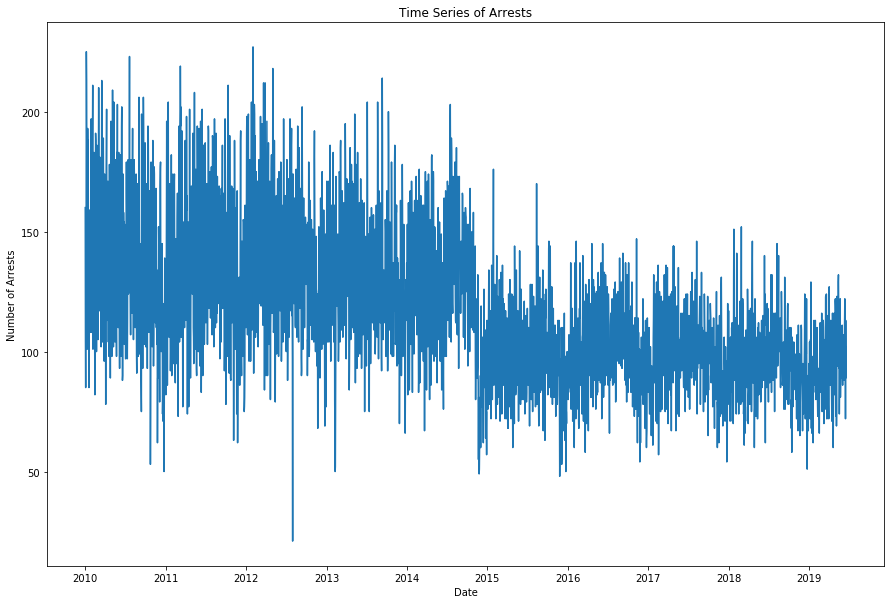

In [72]:
# x axis values 
x = daily_arrest['Arrest Date']

# corresponding y axis values 
y = daily_arrest['Arrests']

# plotting the points 
plt.figure(figsize = (15, 10))
plt.plot(x, y)

# naming the x axis 
plt.xlabel('Date') 

# naming the y axis 
plt.ylabel('Number of Arrests') 

# giving a title to my graph 
plt.title('Time Series of Arrests') 


# function to show the plot 
plt.show() 

In [73]:
monthly_arrest = arrest_df[['Arrest Date', 'Arrests']]

monthly_arrest = monthly_arrest.set_index('Arrest Date')

monthly_arrest = monthly_arrest.resample('M').sum()

monthly_arrest.reset_index(inplace=True)

In [74]:
monthly_arrest.head()

monthly_arrest = monthly_arrest.drop(113, axis=0)

monthly_arrest.tail(30)

,Arrest Date,Arrests
83,2016-12-31,2816
84,2017-01-31,2797
85,2017-02-28,2778
86,2017-03-31,3235
87,2017-04-30,3097
88,2017-05-31,3140
89,2017-06-30,3068
90,2017-07-31,3113
91,2017-08-31,3313
92,2017-09-30,2980


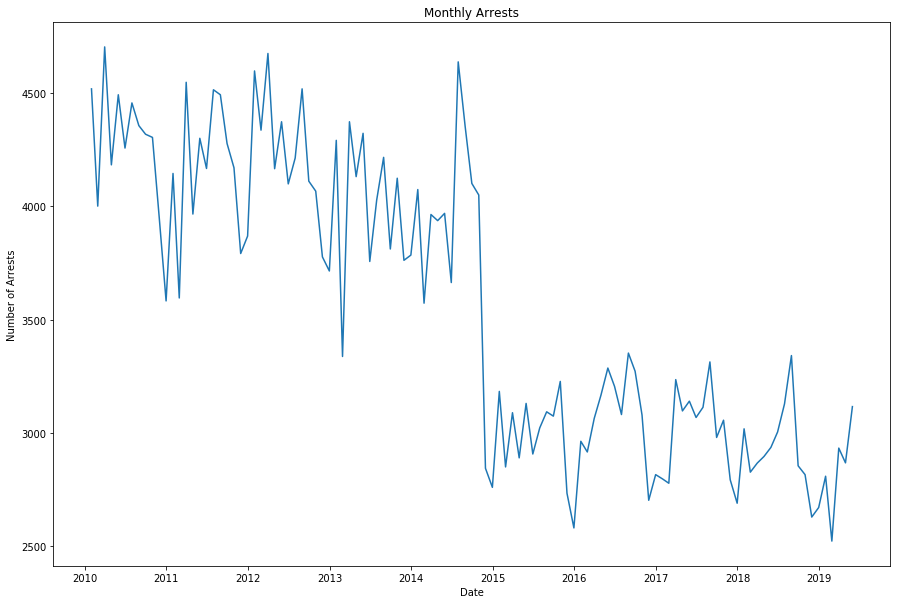

In [75]:
# x axis values 
x = monthly_arrest['Arrest Date']

# corresponding y axis values 
y = monthly_arrest['Arrests']

# plotting the points 
plt.figure(figsize = (15, 10))
plt.plot(x, y)

# naming the x axis 
plt.xlabel('Date') 

# naming the y axis 
plt.ylabel('Number of Arrests') 

# giving a title to my graph 
plt.title('Monthly Arrests') 


# function to show the plot 
plt.show() 

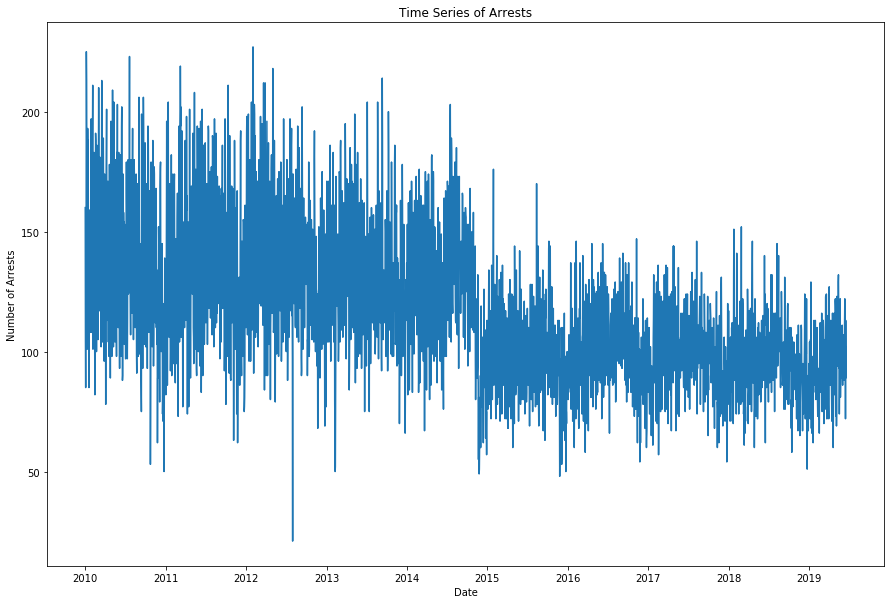

In [76]:
# x axis values 
x = daily_arrest['Arrest Date']

# corresponding y axis values 
y = daily_arrest['Arrests']

# plotting the points 
plt.figure(figsize = (15, 10))
plt.plot(x, y)

# naming the x axis 
plt.xlabel('Date') 

# naming the y axis 
plt.ylabel('Number of Arrests') 

# giving a title to my graph 
plt.title('Time Series of Arrests') 


# function to show the plot 
plt.show() 

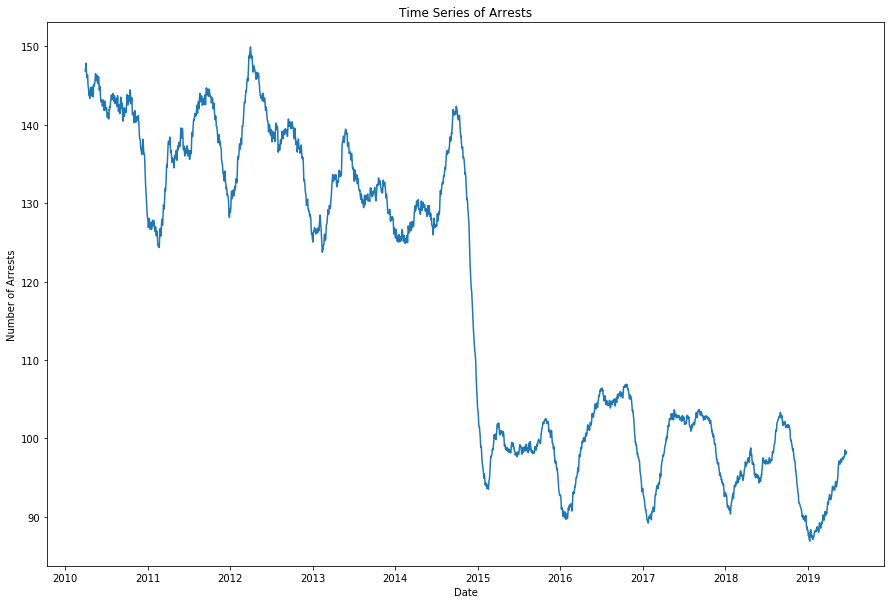

In [77]:
# x axis values 
x = daily_arrest['Arrest Date']

# corresponding y axis values 
y = daily_arrest.Arrests.rolling(window=90).mean()

# plotting the points 
plt.figure(figsize = (15, 10))
plt.plot(x, y)

# naming the x axis 
plt.xlabel('Date') 

# naming the y axis 
plt.ylabel('Number of Arrests') 

# giving a title to my graph 
plt.title('Time Series of Arrests') 


# function to show the plot 
plt.show() 

##  Violent Crime (Assualt, Rape, and Homocide)

In [78]:
rh_crime = crime_df

In [79]:



rh_crime.loc[:, 'Violent_Crimes'] = 0

rh_crime.loc[(rh_crime['Crime Code'] == 110) |
             (rh_crime['Crime Code'] == 113) |
             (rh_crime['Crime Code'] == 121) |
             (rh_crime['Crime Code'] == 122) |
             (rh_crime['Crime Code'] == 815) |
             (rh_crime['Crime Code'] == 820) |
             (rh_crime['Crime Code'] == 821) |
             (rh_crime['Crime Code'] == 210) |
             (rh_crime['Crime Code'] == 220) |
             (rh_crime['Crime Code'] == 230) |
             (rh_crime['Crime Code'] == 231) |
             (rh_crime['Crime Code'] == 235) |
             (rh_crime['Crime Code'] == 236) |
             (rh_crime['Crime Code'] == 250) |
             (rh_crime['Crime Code'] == 251) |
             (rh_crime['Crime Code'] == 761) |
             (rh_crime['Crime Code'] == 926)
             , 'Violent_Crimes'] = 1

rh_crime = rh_crime[rh_crime['Violent_Crimes'] == 1]

rh_crime.head()

,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,MO Codes,...,Status Description,Crime Code 1,Crime Code 2,Crime Code 3,Crime Code 4,Address,Cross Street,Location,Crimes,Violent_Crimes
251,102019318,2010-08-27T00:00:00,2010-08-27T00:00:00,1255,20,Olympic,2033,220,ATTEMPTED ROBBERY,0355 0432,...,Invest Cont,220.0,NaN,NaN,NaN,7TH,HARVARD,"{'latitude': '34.0597', 'needs_recoding': Fals...",1,1
278,112004812,2011-01-15T00:00:00,2010-12-24T00:00:00,2100,20,Olympic,2015,210,ROBBERY,0334 0337 0344 0906,...,Adult Other,210.0,NaN,NaN,NaN,KENMORE,BEVERLY,"{'latitude': '34.0763', 'needs_recoding': Fals...",1,1
284,172111385,2017-05-19T00:00:00,2010-01-01T00:00:00,1200,21,Topanga,2177,121,"RAPE, FORCIBLE",2000 0519 1813,...,Adult Other,121.0,NaN,NaN,NaN,21500 CALIFA ST,NaN,"{'latitude': '34.1773', 'needs_recoding': Fals...",1,1
364,102105808,2010-02-03T00:00:00,2010-02-02T00:00:00,1800,21,Topanga,2173,210,ROBBERY,NaN,...,Invest Cont,210.0,NaN,NaN,NaN,FALLBROOK,VENTURA,"{'latitude': '34.166', 'needs_recoding': False...",1,1
370,102116632,2010-08-30T00:00:00,2010-08-30T00:00:00,2330,21,Topanga,2114,210,ROBBERY,0302 0334 0337 0344 1309,...,Invest Cont,210.0,NaN,NaN,NaN,8200 TOPANGA CANYON BL,NaN,"{'latitude': '34.2176', 'needs_recoding': Fals...",1,1


HOMICIDE 110 (Homicide)
113 (Manslaughter)
RAPE 121 (Rape)
122 (Attempted Rape)
815 (Sexual Penetration w/ Foreign Object)
820 (Oral Copulation)
821 (Sodomy)
ROBBERY 210 (Robbery)
220 (Robbery - attempted)
AGG. ASSAULTS 230 (ADW)
231 (ADW against LAPD Police Officer)
235 (Child beating)
DV* 236 (Spousal beating)
250 (Shots Fired)
251 (Shots fired inhabited dwelling)
761 (Brandishing)
926 (Train Wrecking)

In [80]:
crime_df['Date Occurred'] = pd.to_datetime(crime_df['Date Occurred'])

monthly_df = crime_df[['Date Occurred', 'Crimes']]

monthly_df = monthly_df.set_index('Date Occurred')

monthly_df = monthly_df.resample('M').sum()

monthly_df.reset_index(inplace=True)

monthly_df = monthly_df.drop(113, axis=0)

monthly_df.head()

,Date Occurred,Crimes
0,2010-01-31,19373
1,2010-02-28,15999
2,2010-03-31,18107
3,2010-04-30,17748
4,2010-05-31,17699


In [81]:
rh_crime['Date Occurred'] = pd.to_datetime(crime_df['Date Occurred'])

rh_df = rh_crime[['Date Occurred', 'Violent_Crimes']]

rh_df = rh_df.set_index('Date Occurred')

rh_df = rh_df.resample('M').sum()

rh_df.reset_index(inplace=True)

rh_df = rh_df.drop(113, axis=0)

rh_df.head()

C:\Users\Jordan\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Date Occurred,Violent_Crimes
0,2010-01-31,2087
1,2010-02-28,1741
2,2010-03-31,1857
3,2010-04-30,1933
4,2010-05-31,1980


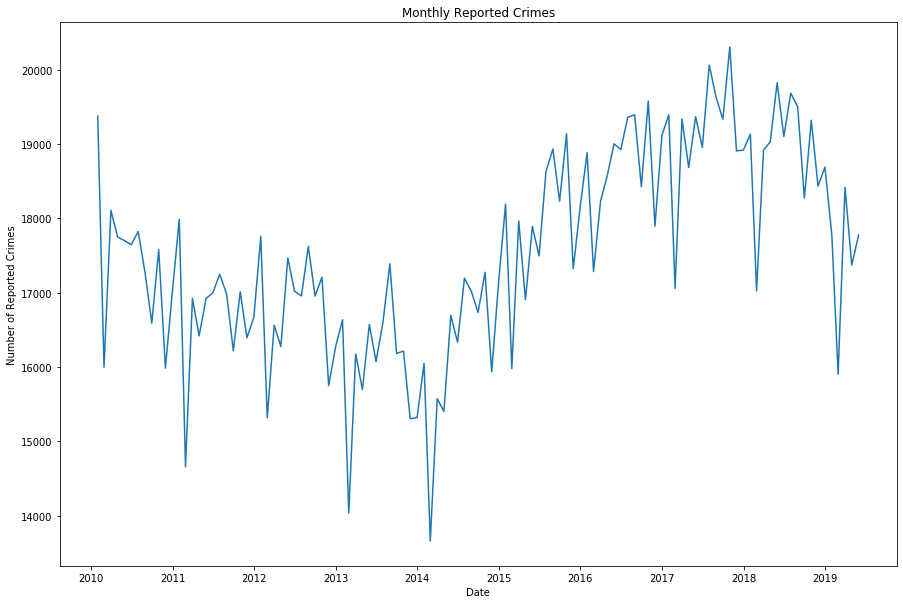

In [82]:
# x axis values 
x = monthly_df['Date Occurred']

# corresponding y axis values 
y = monthly_df['Crimes']

# plotting the points 
plt.figure(figsize = (15, 10))
plt.plot(x, y)

# naming the x axis 
plt.xlabel('Date') 

# naming the y axis 
plt.ylabel('Number of Reported Crimes') 

# giving a title to my graph 
plt.title('Monthly Reported Crimes') 


# function to show the plot 
plt.show() 

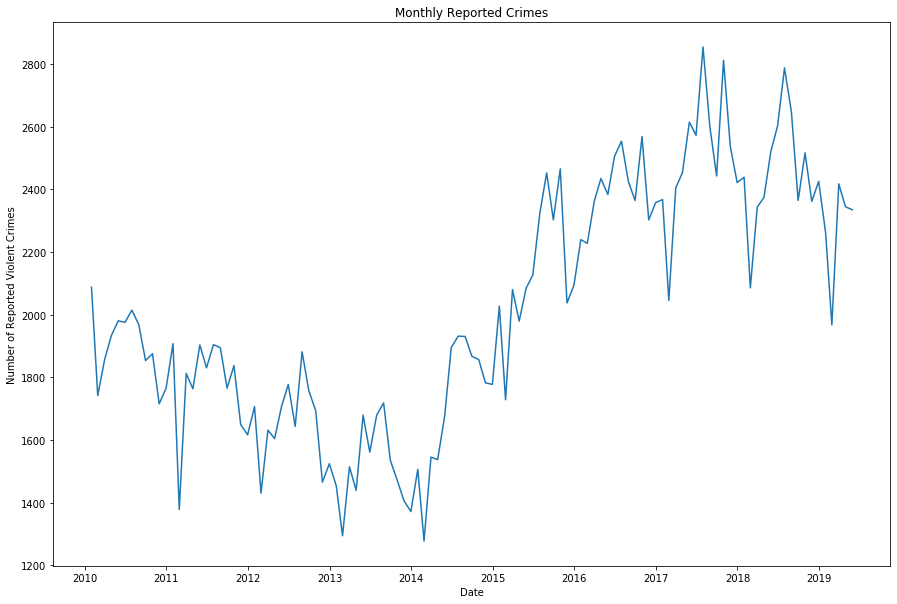

In [83]:
# x axis values 
x = rh_df['Date Occurred']

# corresponding y axis values 
y = rh_df['Violent_Crimes']

# plotting the points 
plt.figure(figsize = (15, 10))
plt.plot(x, y)

# naming the x axis 
plt.xlabel('Date') 

# naming the y axis 
plt.ylabel('Number of Reported Violent Crimes') 

# giving a title to my graph 
plt.title('Monthly Reported Crimes') 


# function to show the plot 
plt.show() 

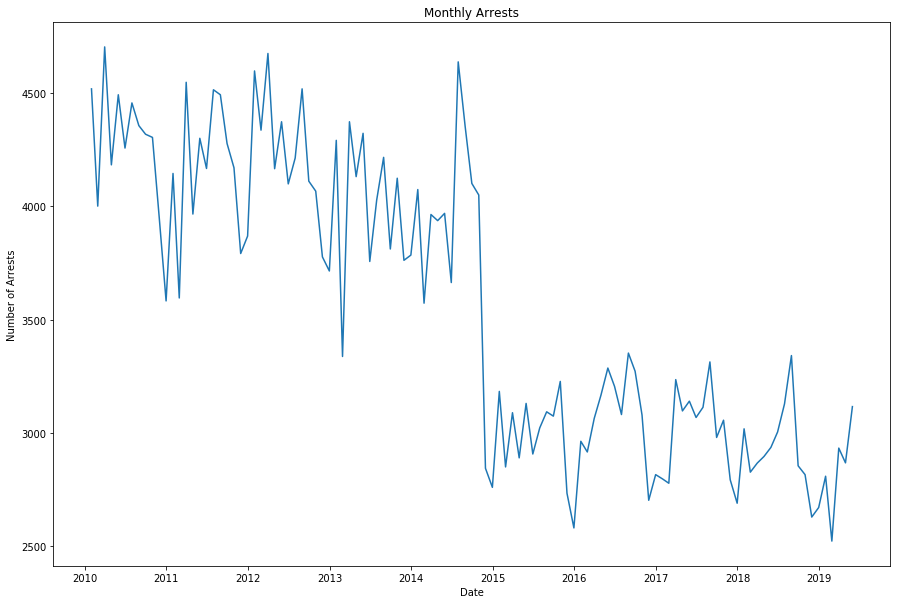

In [84]:
# x axis values 
x = monthly_arrest['Arrest Date']

# corresponding y axis values 
y = monthly_arrest['Arrests']

# plotting the points 
plt.figure(figsize = (15, 10))
plt.plot(x, y)

# naming the x axis 
plt.xlabel('Date') 

# naming the y axis 
plt.ylabel('Number of Arrests') 

# giving a title to my graph 
plt.title('Monthly Arrests') 


# function to show the plot 
plt.show() 

<Figure size 1080x720 with 0 Axes>

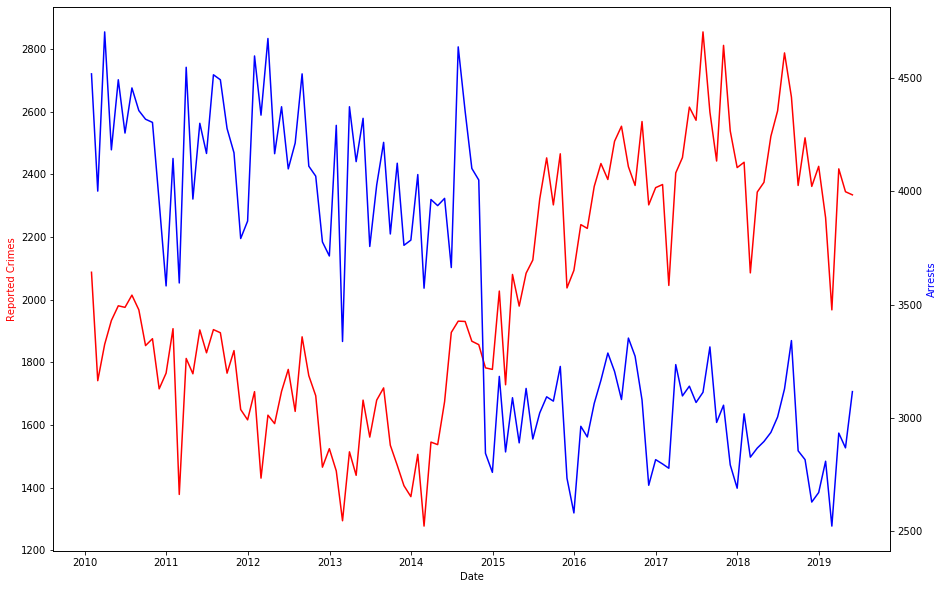

In [85]:
# x axis values 
x1 = rh_df['Date Occurred']

# corresponding y axis values 
y1 = rh_df['Violent_Crimes']

# x axis values 
x2 = monthly_arrest['Arrest Date']

# corresponding y axis values 
y2 = monthly_arrest['Arrests']

# plotting the points 
plt.figure(figsize = (15, 10))
#plt.plot(x1, y1, x2, y2)

# naming the x axis 
#plt.xlabel('Date') 

# naming the y axis 
#plt.ylabel('Number of Arrests') 


# giving a title to my graph 
#plt.title('Monthly Reported Crimes vs Arrests') 

fig, ax1 = plt.subplots(figsize = (15, 10))

ax2 = ax1.twinx()
ax1.plot(x1, y1, 'r-')
ax2.plot(x2, y2, 'b-')

ax1.set_xlabel('Date')
ax1.set_ylabel('Reported Crimes', color='r')
ax2.set_ylabel('Arrests', color='b')

plt.show()

# function to show the plot 
#plt.show() 

<Figure size 1080x720 with 0 Axes>

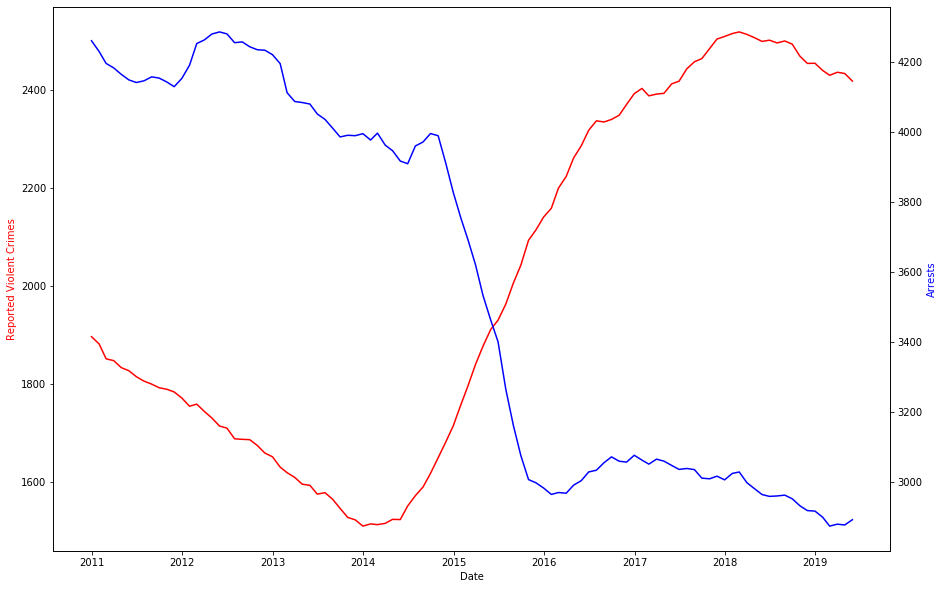

In [86]:
# x axis values 
x1 = rh_df['Date Occurred']

# corresponding y axis values 
y1 = rh_df['Violent_Crimes']

# x axis values 
x2 = monthly_arrest['Arrest Date']

# corresponding y axis values 
y2 = monthly_arrest['Arrests']


y1_ma = rh_df.Violent_Crimes.rolling(window=12).mean()

y2_ma = monthly_arrest.Arrests.rolling(window=12).mean()



# plotting the points 
plt.figure(figsize = (15, 10))
#plt.plot(x1, y1, x2, y2)

# naming the x axis 
#plt.xlabel('Date') 

# naming the y axis 
#plt.ylabel('Number of Arrests') 


# giving a title to my graph 
#plt.title('Monthly Reported Crimes vs Arrests') 

fig, ax1 = plt.subplots(figsize = (15, 10))

ax2 = ax1.twinx()
ax1.plot(x1, y1_ma, 'r-')
ax2.plot(x2, y2_ma, 'b-')

ax1.set_xlabel('Date')
ax1.set_ylabel('Reported Violent Crimes', color='r')
ax2.set_ylabel('Arrests', color='b')

plt.show()

# function to show the plot 
#plt.show() 


<Figure size 1080x720 with 0 Axes>

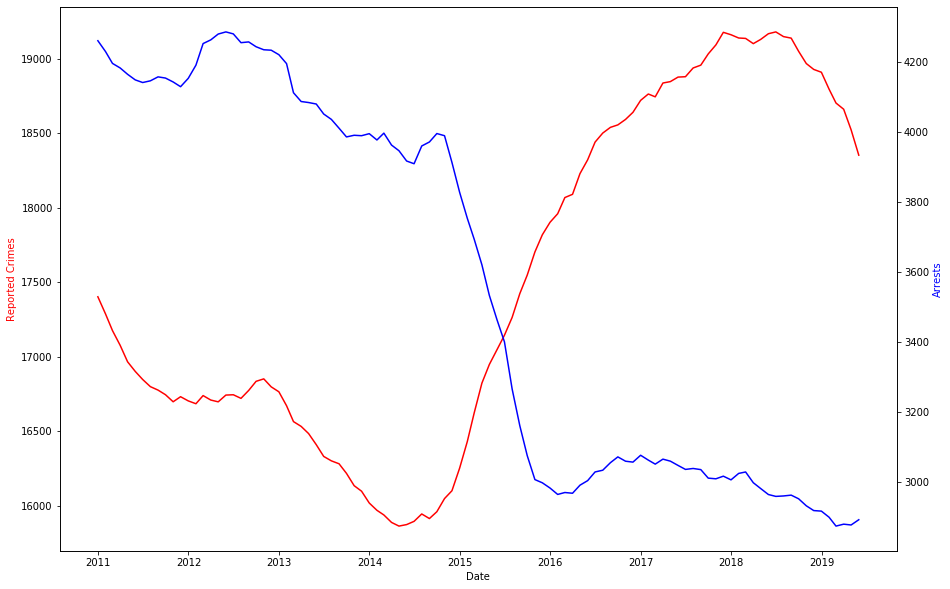

In [87]:
# x axis values 
x1 = monthly_df['Date Occurred']

# corresponding y axis values 
y1 = monthly_df['Crimes']

# x axis values 
x2 = monthly_arrest['Arrest Date']

# corresponding y axis values 
y2 = monthly_arrest['Arrests']


y1_ma = monthly_df.Crimes.rolling(window=12).mean()

y2_ma = monthly_arrest.Arrests.rolling(window=12).mean()



# plotting the points 
plt.figure(figsize = (15, 10))
#plt.plot(x1, y1, x2, y2)

# naming the x axis 
#plt.xlabel('Date') 

# naming the y axis 
#plt.ylabel('Number of Arrests') 


# giving a title to my graph 
#plt.title('Monthly Reported Crimes vs Arrests') 

fig, ax1 = plt.subplots(figsize = (15, 10))

ax2 = ax1.twinx()
ax1.plot(x1, y1_ma, 'r-')
ax2.plot(x2, y2_ma, 'b-')

ax1.set_xlabel('Date')
ax1.set_ylabel('Reported Crimes', color='r')
ax2.set_ylabel('Arrests', color='b')

plt.show()

# function to show the plot 
#plt.show() 


Possible explanations of the decline in felony arrests:

1) Data issue

2) Prop 47: "California Proposition 47, the Reduced Penalties for Some Crimes Initiative, was on the November 4, 2014 ballot in California as an initiated state statute. The measure was approved...The initiative reduced the classification of most nonviolent property and drug crimes—including theft and fraud for amounts up to $950—from a felony to a misdemeanor."

Classification issue for arrests--although there is a decline in total arrests.

3) Body cameras: "Beginning in September 2013, the LAPD started a trial program for the use of body worn cameras with 30 officers in the Skid Row area.[97] Reports from the trial program indicated that the cameras functioned well and that they assisted in deescalating situations although there were some technical issues with the cameras along with slight issues with the cameras falling off of officers during movement.[98][99] In November 2014, in a sign of body camera purchases to come, the department chose Taser International as the vendor for body cameras to be used by the LAPD after their use in the trial program earlier in the year.[100][101] On December 16, 2014, Mayor Eric Garcetti announced that the city would purchase 7,000 body worn cameras from Taser for use by the department.[102] Patrol officers will be equipped with the cameras which will be purchased in the next fiscal year in order to outfit all patrol officers by the expected completion date in June 2016.[needs update][103] 700 of the cameras will first be deployed to patrol officers in the Central, Mission and Newton patrol areas of the city beginning in January 2015.[103]"

https://en.wikipedia.org/wiki/Los_Angeles_Police_Department#Body_cameras

http://assets.lapdonline.org/assets/pdf/3.pdf


While it is possible that this is responsible policing policy, there may be an unintended consequence of this policy. Police may be less likely to make arrests if they understand believe engaging with the public (i.e., making arrests) may result in a situation in which they could lose their job or pension due to the constant surveillance of a body camera.
